# Control Systems

author: Thomas Haslwanter, date: Dec-2019

## Preliminaries

In [1]:
# Import the required packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Dynamics

### Damped Oscillator

A *damped oscillator* can be implemented by the following mechanical system:

<img src="data/images/1D_movement.png" style="width: 300px;"/>

* x ... position of mass in space
* b ... position of base
* k ... spring constant
* $\delta = b - x$ ... difference

\begin{equation}
    m \ddot{x} = r \dot{\delta} + k * \delta
\end{equation}
\begin{equation}
    m \ddot{b} = m \ddot{\delta} + r \dot{\delta} + k * \delta
\end{equation}

### Laplace Transformation

Differential equations like the one above can be converted into - easily solvable - algebraic equations, by making use of the *Laplace Transofmation*. Given any time course f(t), its Laplace transform F(s) is

\begin{equation}
  F(s) = \int\limits_0^\infty  {f(t) \cdot {e^{ - st}}dt}
\end{equation}
	
while its inverse is

\begin{equation}
  f(t) = \int\limits_S {F(s) \cdot {e^{st}}ds}
\end{equation}

where the integration is over the s-plane, S. s is sometimes referred to as *complex frequency*.

Laplace Transformations are a generalization of Fourier Transformation. With Fourier Transformations we have dealt only with sine waves, $e^{j \omega t}$ . Put another way, we have restricted $s$ to $j \omega$ so that est was restricted to $e^{j \omega t}$. But this is unnecessary, we can let $s$ enjoy being fully complex or $s = \sigma + j \omega$ . This greatly expands the kinds of functions that $e^{st}$ can represent.


With a Laplace transformation, where

\begin{equation}
    \frac{dx}{dt} \rightarrow s \tilde{X} - x(0)
\end{equation}
the differntial equation above is transformed into

\begin{equation}
    \frac{\delta}{sB} = \frac{m * s}{m s^2 + r s + k}
\end{equation}

#### Example: Kick a Damped Oscillator

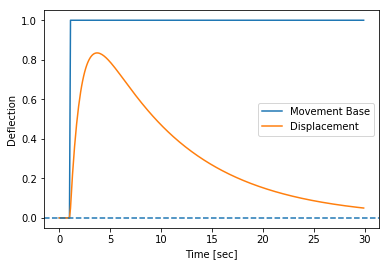

In [2]:
# Import the required modules
from scipy import signal

# Define the system
m, r, k = 1, 1, 0.1
num = [m, 0]
den = [m, r, k]
system = signal.lti(num, den)

# Define the input
t = np.arange(0, 30, 0.1)
x = np.zeros_like(t)
x[t>1] = 1

# Simulate the system response
tout, outSignal, xout = signal.lsim(system, x, t)

# Plot the output
plt.plot(t, x, label='Movement Base')
plt.plot(tout, outSignal, label='Displacement')
plt.legend()
plt.xlabel('Time [sec]')
plt.ylabel('Deflection')
plt.ylim(-0.05, 1.05)
plt.axhline(0, linestyle='--')

## Analysis

### Position from acceleration

* Select a *reference position*
* Define a coordinate system (typically a *right-handed* coordinate systems)
* Take the (discrete) velocity v(t)

\begin{equation}
    \vec{x}(t) = \vec{x}(0) + \sum_{i=1}^{n}{\vec{v}(t_i) dt}
\end{equation}

Text(0.5,0,'Time [sec]')

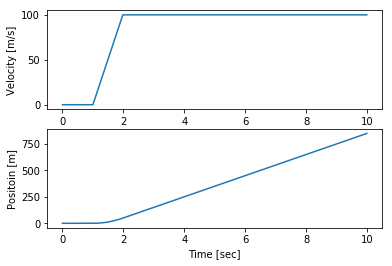

In [6]:
# For example, calculate the position from a velocity step
from scipy.integrate import cumtrapz

# Set the experimenal parameters
rate = 50     # sample rate, in [Hz]
duration = 10  # [sec]
vel_max = 100
x0 = 0         # Initial potiion

# Simulate the velocity step
t = np.arange(duration*rate)/rate
vel = np.zeros(duration*rate)
vel[2*rate:]= vel_max  # deg/sec
vel[rate:2*rate] = np.linspace(0, vel_max, rate)

# Calculate the corresponding position in space
pos = cumtrapz(vel, dx=1/rate, initial=x0)

fig, axs = plt.subplots(2,1)
axs[0].plot(t, vel)
axs[0].set_ylabel('Velocity [m/s]')
axs[1].plot(t, pos)
axs[1].set_ylabel('Positoin [m]')
axs[1].set_xlabel('Time [sec]')

<img src="data/images/CCA_40.png">
This page is licensed under a Creative Commons Attribution 4.0 International License.